In [1]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 10.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 7.8 MB/s eta 0:00:00a 0:00:01


In [2]:
import os
import csv
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from contextlib import contextmanager
from utils import npy_save

In [3]:
def get_files(method:str, selection):
    path = f'/workspace/accuracy/{selection}/{method}/'
    file_list = os.listdir(path+'csv_files')
    file_list_csv = [file for file in file_list if file.endswith('.csv')]
    seeds = []
    pattern = f'{method}_sparse_output_([0-9]+).csv'
    for file in file_list_csv:
        result = re.search(pattern, file)
        seeds.append(result.group(1))
    return path, file_list_csv, seeds

In [4]:
def data_sorting(file_str):
    data = pd.read_csv(file_str)
    data_sorted = data.sort_values(by="sparsity").drop_duplicates(subset=['sparsity'], keep = 'first')
    return data_sorted

In [5]:
@contextmanager
def savefig(path_str,filename):
    dir_name = os.path.dirname(path_str)
    if not os.path.isdir(dir_name):
        os.makedirs(dir_name)
    yield plt.savefig(path_str+filename)

In [6]:
def save_means(method:str, selection:str = '[1, 0]'):
    path, file_list, seeds = get_files(method, selection)
    sorted_datas = []
    total_results = []
    for i in range(len(file_list)):
        sorted_datas.append(data_sorting(path+'csv_files/'+file_list[i]))
    results = pd.concat(sorted_datas)
    sparsitys = results['sparsity'].drop_duplicates()

    for i in sparsitys:
        total_results.append(np.array(results['accuracy'][results['sparsity'] == i]).mean())

    with npy_save(path + 'mean_result.npy', np.array(total_results)) as npy:
        npy
    with npy_save(path + 'sparsity.npy', np.array(sparsitys)) as npy:
        npy
    return path, file_list, seeds

In [7]:
def draw_diff_select(method:str, selections:list):
    means = []
    for selection in selections:
        mean = np.load(f'/workspace/accuracy/{selection}/{method}/mean_result.npy', allow_pickle=True)
        sparsity = np.load(f'/workspace/accuracy/{selection}/{method}/sparsity.npy', allow_pickle=True)
        plt.plot(sparsity, mean, label=str(selection))
    plt.title(f"{method} Insparsity-Accurancy Graph")
    plt.xlabel("Insparsity")
    plt.ylabel("accuracy")
    plt.legend()
    plt.savefig(f'/workspace/accuracy/diff_select_graph_{method}.png')
    plt.clf()

In [8]:
def save_graphs(method:str, selection):
    path, file_list, seeds = get_files(method, selection=selection)
    for i in range(len(file_list)):
        data = data_sorting(path+'csv_files/'+file_list[i])
        sparsity = np.array(data["sparsity"])
        accuracy = np.array(data["accuracy"])
        plt.plot(sparsity,accuracy)
        plt.xlabel("insparsity")
        plt.ylabel("accuracy")
        plt.title(f"{method}_{seeds[i]}")
        with savefig(path+'eachfig/', f"{method}_{seeds[i]}.png") as save:
            save
        plt.clf()

In [9]:
def box_graphs(method:str, selection):
    path, file_list, seeds = get_files(method, selection)
    sorted_datas = []
    total_results = []
    for i in range(len(file_list)):
        sorted_datas.append(data_sorting(path+'csv_files/'+file_list[i]))
    results = pd.concat(sorted_datas)
    sparsitys = list(results['sparsity'].drop_duplicates())

    for i in list(sparsitys):
        total_results.append(list(results['accuracy'][results['sparsity'] == i]))

    plt.boxplot(total_results)
    plt.xticks(range(1,len(sparsitys)+1), sparsitys)
    plt.title(f'boxplot of {method}_{selection}_sampling{len(file_list)}')
    plt.xlabel("insparsity")
    plt.ylabel('accuracy')
    with savefig(path+'meanfig/', f"{method}_{selection}.png") as save:
        save
    plt.clf()

In [10]:
def mean_graphs(method:str, selection):
    path, file_list, seeds = save_means(method, selection)
    total_results = np.load(f'/workspace/accuracy/{selection}/{method}/mean_result.npy', allow_pickle=True)
    sparsity = np.load(f'/workspace/accuracy/{selection}/{method}/sparsity.npy', allow_pickle=True)
    
    plt.plot(sparsity, np.array(total_results))
    plt.title(f'meanplot of {method}_{selection}_sampling{len(file_list)}')
    plt.xlabel("insparsity")
    plt.ylabel('accuracy')
    with savefig(path+'meanfig/', f"{method}_{selection}_mean.png") as save:
        save
    plt.clf()

In [11]:
def log_graphs(method:str, selection):
    path, file_list, seeds = save_means(method, selection)
    total_results = np.load(f'/workspace/accuracy/{selection}/{method}/mean_result.npy', allow_pickle=True)
    sparsity = np.load(f'/workspace/accuracy/{selection}/{method}/sparsity.npy', allow_pickle=True)
    
    plt.plot(sparsity, np.array(total_results))
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'logx, logy plot of {method}_{selection}_sampling{len(file_list)}')
    plt.xlabel("insparsity")
    plt.ylabel('accuracy')
    with savefig(path+'meanfig/', f"{method}_{selection}_log.png") as save:
        save
    plt.clf()

In [12]:
def logx_graphs(method:str, selection):
    path, file_list, seeds = save_means(method, selection)
    total_results = np.load(f'/workspace/accuracy/{selection}/{method}/mean_result.npy', allow_pickle=True)
    sparsity = np.load(f'/workspace/accuracy/{selection}/{method}/sparsity.npy', allow_pickle=True)
    
    plt.plot(sparsity, np.array(total_results))
    plt.xscale('log')
    plt.title(f'logx plot of {method}_{selection}_sampling{len(file_list)}')
    plt.xlabel("insparsity")
    plt.ylabel('accuracy')
    with savefig(path+'meanfig/', f"{method}_{selection}_logx.png") as save:
        save
    plt.clf()

In [13]:
def logy_graphs(method:str, selection):
    path, file_list, seeds = save_means(method, selection)
    total_results = np.load(f'/workspace/accuracy/{selection}/{method}/mean_result.npy', allow_pickle=True)
    sparsity = np.load(f'/workspace/accuracy/{selection}/{method}/sparsity.npy', allow_pickle=True)
    
    plt.plot(sparsity, np.array(total_results))
    plt.yscale('log')
    plt.title(f'logy plot of {method}_{selection}_sampling{len(file_list)}')
    plt.xlabel("insparsity")
    plt.ylabel('accuracy')
    with savefig(path+'meanfig/', f"{method}_{selection}_logy.png") as save:
        save
    plt.clf()

In [14]:
method_list=['block', 'random', 'origin', 'diagonal', 'threshold']
selection_list = ['[1, 0]', '[1, 7]', '[5, 9]', '[3, 6]']
def draw_all_graphs(graph_fun, selections=selection_list, method_list=method_list):
    for selection in selections: 
        for method_str in method_list:
            graph_fun(method_str, selection)
    return None

In [182]:
draw_all_graphs(box_graphs)

In [183]:
draw_all_graphs(save_graphs)

In [ ]:
draw_all_graphs(mean_graphs)

In [ ]:
draw_all_graphs(log_graphs)

In [ ]:
draw_all_graphs(logx_graphs)

In [ ]:
draw_all_graphs(logy_graphs)

In [ ]:
method_list=['origin', 'diagonal', 'block', 'random', 'threshold']
selection_list=['[1, 0]','[5, 9]','[1, 7]', '[3, 6]']
for selection in selection_list:
    for method in method_list:
        save_means(method, selection) 

In [ ]:
method_list=['origin', 'diagonal', 'block', 'random', 'threshold']
selection_list=['[1, 0]','[5, 9]','[1, 7]', '[3, 6]']
for method in method_list:
    draw_diff_select(method=method, selections=selection_list)

In [128]:
"""
from utils import csv_append

selection_list = ['[1, 0]', '[1, 7]', '[5, 9]', '[3, 6]']
for selection in selection_list:
    path, file_list, seeds = get_files(method='threshold', selection=selection)
    for i in range(len(file_list)):
        data = data_sorting(path+'csv_files/'+file_list[i])
        sparsity = np.array(data["sparsity"])
        sparsity = np.ones(sparsity.shape)*(256**2)-sparsity
        accuracy = np.array(data["accuracy"])
        with csv_append(f'/workspace/accuracy/{selection}/threshold/csv_files_changed/threshold_sparse_output_{seeds[i]}.csv') as wr:
            for j in range(len(sparsity)):
                wr.writerow([sparsity[j], accuracy[j]])
"""
        

'\nfrom utils import csv_append\n\nselection_list = [\'[1, 0]\', \'[1, 7]\', \'[5, 9]\', \'[3, 6]\']\nfor selection in selection_list:\n    path, file_list, seeds = get_files(method=\'threshold\', selection=selection)\n    for i in range(len(file_list)):\n        data = data_sorting(path+\'csv_files/\'+file_list[i])\n        sparsity = np.array(data["sparsity"])\n        sparsity = np.ones(sparsity.shape)*(256**2)-sparsity\n        accuracy = np.array(data["accuracy"])\n        with csv_append(f\'/workspace/accuracy/{selection}/threshold/csv_files_changed/threshold_sparse_output_{seeds[i]}.csv\') as wr:\n            for j in range(len(sparsity)):\n                wr.writerow([sparsity[j], accuracy[j]])\n'

In [24]:
save_graphs('half_single_anti_diagonal', selection='[1, 0]')

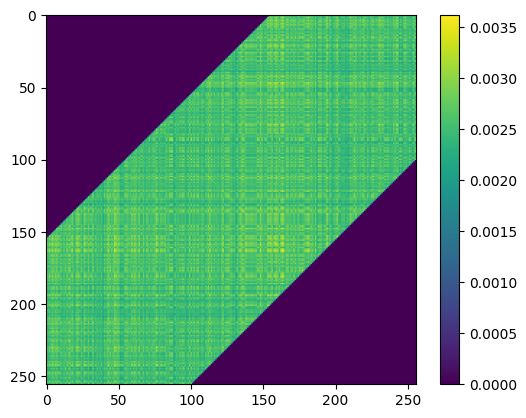

In [26]:
kernel = np.load("/workspace/kernel/[1, 0]/anti_diagonal/4087/kernel_train_100.npy")
plt.imshow(kernel)
plt.colorbar()
plt.show()